In [2]:
###########################################################################
#Developed by Jonathan Ojeda 29/1/2021 QAAFI UQ
# Code functionalities:
# Read netCDF using xarray
# Explore and plot multidimensional files using xarray 
# Create maps using xarray and dataframes
# Create 2D dataframe from xarray
# Create Multi-dimensional xarray from 2D pandas dataframe
###########################################################################

In [213]:
#Required packages
import os
os.environ["PROJ_LIB"] = r'C:\Users\uqjojeda\Anaconda3\Library\share'; #fixr
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import matplotlib.ticker as ticker
import glob

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [549]:
#Read and merge all nc files from psims
df_final = xr.merge([xr.open_dataset(f, decode_times=False) for f in glob.glob(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\new\run004\parts\*.nc')])
#df_final = xarray.open_mfdataset(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\new\run004\parts\*.nc')

In [551]:
#write complete nc file
#df_final.to_netcdf(r'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/outputs/new/run004/all2.nc')

In [ ]:
df_final

In [565]:
df_final.biomass[0:,1,0:,1].values.shape

(104, 52)

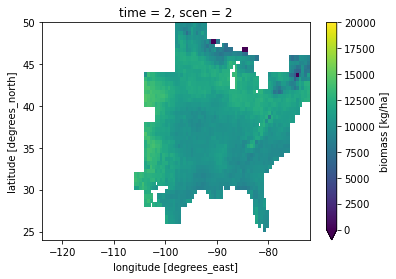

In [566]:
df_final.biomass[0:,1,0:,1].plot(yincrease=True,vmin=0, vmax=20000, x='lon', y='lat')

## Work with multidimensional dataframes using xarray

In [578]:
# replace all values equal to -99 with np.nan
#data_mean = data0.where(data0['biomass'] != -99.)
dataPre4 = df_final.where(df_final['biomass'] != -99.)
dataPre3 = dataPre4.where(dataPre4['FloweringDAS'] != -99.)
dataPre2 = dataPre3.where(dataPre3['MaxLAI'] != -99.)

#remove data from West Virginia state which was out of bioenergy crop mask
d1 = dataPre2.where(dataPre2.biomass != dataPre2.biomass[83,0:,27,0:], drop=True)
d2 = d1.where(d1.biomass != d1.biomass[84,0:,27,0:], drop=True)
d3 = d2.where(d2.biomass != d2.biomass[85,0:,27,0:], drop=True)
d4 = d3.where(d3.biomass != d3.biomass[86,0:,27,0:], drop=True)
d5 = d4.where(d4.biomass != d4.biomass[87,0:,27,0:], drop=True)
d6 = d5.where(d5.biomass != d5.biomass[83,0:,28,0:], drop=True)
d7 = d6.where(d6.biomass != d6.biomass[84,0:,28,0:], drop=True)
d8 = d7.where(d7.biomass != d7.biomass[85,0:,28,0:], drop=True)
d9 = d8.where(d8.biomass != d8.biomass[86,0:,28,0:], drop=True)
d10 = d9.where(d9.biomass != d9.biomass[87,0:,28,0:], drop=True)
d11 = d10.where(d10.biomass != d10.biomass[84,0:,29,0:], drop=True)
d12 = d11.where(d11.biomass != d11.biomass[85,0:,29,0:], drop=True)
d13 = d12.where(d12.biomass != d12.biomass[86,0:,29,0:], drop=True)
d14 = d13.where(d13.biomass != d13.biomass[87,0:,29,0:], drop=True)
d15 = d14.where(d14.biomass != d14.biomass[88,0:,29,0:], drop=True)
d16 = d15.where(d15.biomass != d15.biomass[89,0:,29,0:], drop=True)
d17 = d16.where(d16.biomass != d16.biomass[85,0:,30,0:], drop=True)
d18 = d17.where(d17.biomass != d17.biomass[86,0:,30,0:], drop=True)
d19 = d18.where(d18.biomass != d18.biomass[87,0:,30,0:], drop=True)
d20 = d19.where(d19.biomass != d19.biomass[88,0:,30,0:], drop=True)
d21 = d20.where(d20.biomass != d20.biomass[89,0:,30,0:], drop=True)
d22 = d21.where(d21.biomass != d21.biomass[90,0:,30,0:], drop=True)
data4 = d22.where(d22.biomass != d22.biomass[86,0:,31,0:], drop=True)

data4['biomass2']=data4['biomass']/1000

In [582]:
#Conver multidimendional frame to 2D frame
data4pd = data4.to_dataframe()
dfc = data4pd[data4pd.biomass != 0]
dfc.reset_index(level=[0,1,2,3], inplace=True)
df = dfc.dropna()

In [586]:
a = df.groupby(['lat', 'lon','scen'],as_index=False).mean()
a.RainIn.quantile(0)

73.85993194580078

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-591-f193cc55a3fa>:50: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


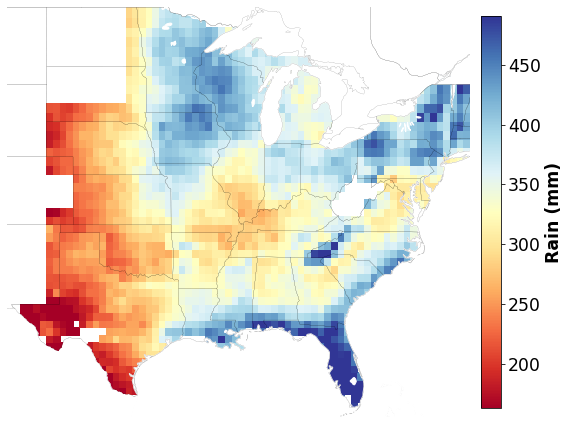

In [591]:
#Plotting single map with mean accum rain
a = df.groupby(['scen', 'lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.RainIn.mean(dim=('time','scen'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu, add_colorbar=False, zorder=1) #vmin=a.RainIn.quantile(0), vmax=a.RainIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, color='k', linewidth=0.1)
ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, color='grey', linewidth=0.1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rain (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rain.png', dpi=600, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-513-5ba8580fff59>:50: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


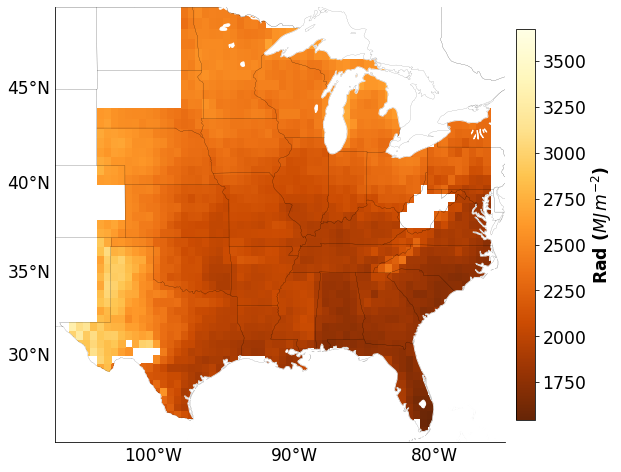

In [513]:
#Plotting single map with mean accum radiation
a = df.groupby(['irr', 'lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.RadiationIn.mean(dim=('time','scen_new','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, add_colorbar=False, zorder=1, vmin=a.RadiationIn.quantile(0), vmax=a.RadiationIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='white',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, color='k', linewidth=0.1)
ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, color='grey', linewidth=0.1)
ax.set_extent([-107, -75, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rad ($MJ\,m^{-2}$)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad.png', dpi=600, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-514-05b2a8c9d862>:50: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


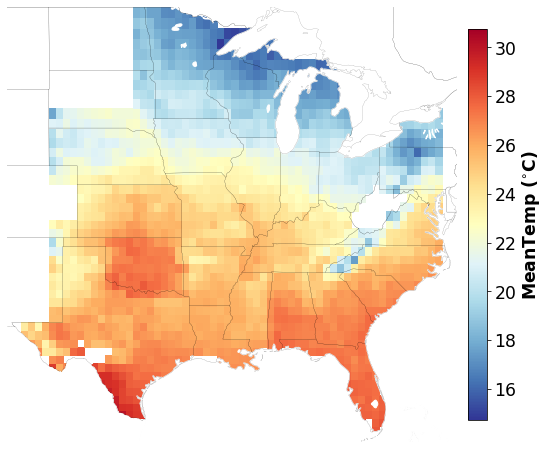

In [514]:
#Plotting single map with mean temperature during the growing cycle
a = df.groupby(['irr', 'lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.TempIn.mean(dim=('time','scen_new','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False, vmin=a.TempIn.quantile(0), vmax=a.TempIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='white',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, color='k', linewidth=0.1)
ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, color='grey', linewidth=0.1)
ax.set_extent([-107, -75, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='MeanTemp ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\temp.png', dpi=600, bbox_inches='tight', pad_inches=0)

In [438]:
a = df.groupby(['lat', 'lon','scen_new','irr'],as_index=False).mean()
a.biomass.quantile(0.9999)

21444.94307695217

In [369]:
enumerate(p.axes.flat)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-486-aaa4f51f9999>:57: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


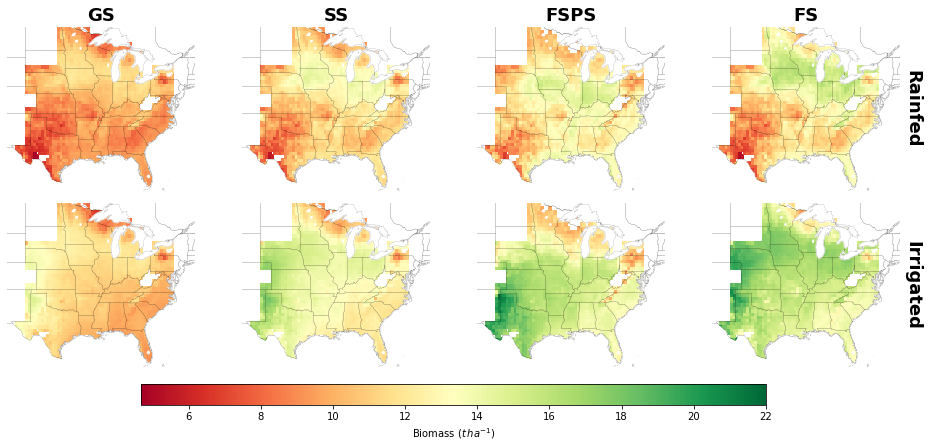

In [486]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','scen_new','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=a.biomass2.quantile(0),vmax=a.biomass2.quantile(1),
    figsize=(16,8), #rasterized=True,
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.25, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.04, shrink=0.7, aspect=30, label='Biomass ($t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\mean_biomass.png', dpi=600, bbox_inches='tight', pad_inches=0)

<AxesSubplot:ylabel='Frequency'>

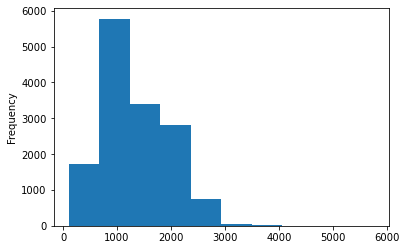

In [421]:
a = df.groupby(['lat', 'lon','scen_new','irr'],as_index=False).std()
a.biomass.plot.hist()

In [431]:
a.biomass.quantile(0.999)

3848.5861668623643

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-444-f2b61d5b3926>:57: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


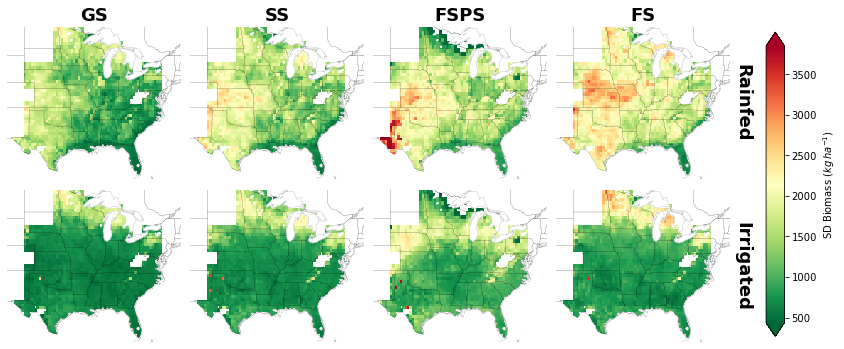

In [444]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','scen_new','irr'],as_index=False).std()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass.std(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=a.biomass.quantile(0.001),vmax=a.biomass.quantile(0.999),
    figsize=(16,8), #rasterized=True,
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='SD Biomass ($kg\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\sd_biomass.png', dpi=600, bbox_inches='tight', pad_inches=0)

## Work with 2D pandas dataframe and correlations

In [447]:
#Conver multidimendional frame to 2D frame
data4pd = data4.to_dataframe()
df = data4pd[data4pd.biomass != 0]
df.reset_index(level=[0,1,2,3,4], inplace=True)

#Change name of column
df.rename(columns={'scen_new':'cultivar'}, inplace=True)

In [449]:
var1.columns

Index(['irr', 'lat', 'lon', 'cultivar', 'time', 'DaysAfterSowing',
       'FertiliserIn', 'FloweringDAS', 'IrrigationIn', 'LeafNo', 'MaxLAI',
       'PAWC', 'RadiationIn', 'RainIn', 'TempIn', 'WU', 'aMaxT', 'aMinT',
       'actual_ET', 'biomass', 'planting_date', 'potential_ET', 'radInt',
       'scen'],
      dtype='object')

In [454]:
#Export data for Variance Decomposition Analysis
dfa = df.dropna()
var1 = dfa.groupby(['irr', 'lat', 'lon', 'cultivar'],as_index=False).mean()

var=var1.drop(['DaysAfterSowing', 'actual_ET', 'planting_date', 'scen','time','aMaxT','aMinT','potential_ET', 'radInt',
              'IrrigationIn','WU','FloweringDAS','LeafNo','MaxLAI','FertiliserIn'], axis=1)

#var.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\tmp\var.csv')

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-460-c86c2e8100de>:80: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


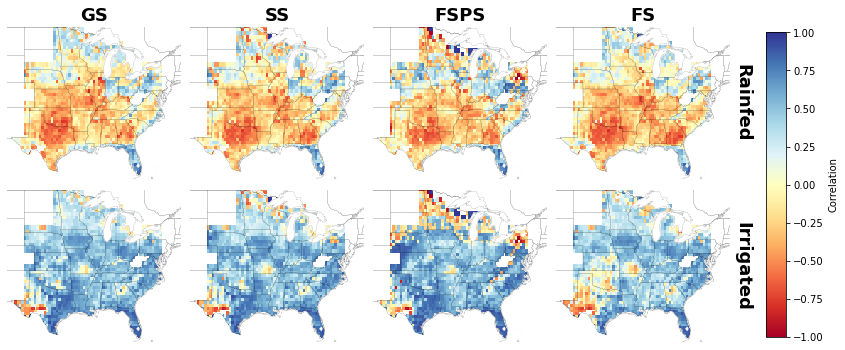

In [460]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='RadiationIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.RadiationIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\radcorr.png', dpi=600, bbox_inches='tight', pad_inches=0)

In [464]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='IrrigationIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.IrrigationIn.plot(x='lon', y='lat', col='cultivar', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=0)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\irricorr.png', dpi=600, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-464-03e8b9d308b7>:80: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


## Heatmap and correlations

In [24]:
#Read dataframe with env names
X= pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\dfenv.csv')

#Merge current dataset to include envs
new = pd.merge(X, df, how ='inner', on =['lat','lon']) 
dfa2=new.drop(['RadiationIn_y','TempIn_y','RainIn_y','biomass_x'], axis=1)
dfa2.rename(columns={'RadiationIn_x':'RadiationIn','TempIn_x':'TempIn','RainIn_x':'RainIn','biomass_y':'biomass'}, inplace=True)
dfa3 = dfa2.dropna()

<AxesSubplot:ylabel='cultivar-irri-env'>

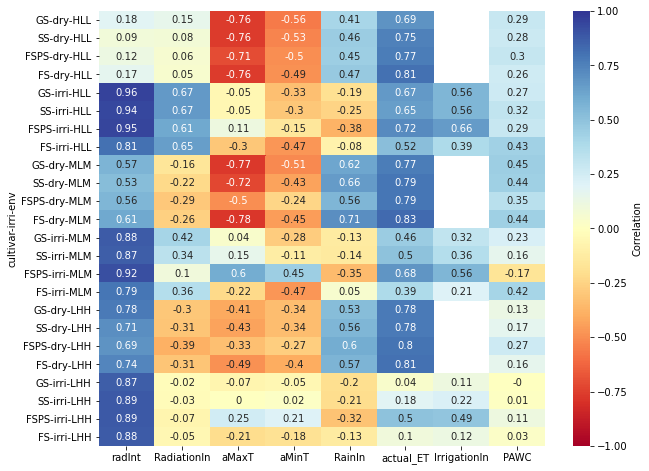

In [50]:
#Create dataframes by irrigation and cultivar

#Create filters and rearrange dataframes
HLL = dfa3.loc[dfa3['env_name'] == 'HLL']
MLM = dfa3.loc[dfa3['env_name'] == 'MLM']
LHH = dfa3.loc[dfa3['env_name'] == 'LHH']

HLLdry = HLL.loc[HLL['irr'] == 1]
HLLirri = HLL.loc[HLL['irr'] == 2]
MLMdry = MLM.loc[MLM['irr'] == 1]
MLMirri = MLM.loc[MLM['irr'] == 2]
LHHdry = LHH.loc[LHH['irr'] == 1]
LHHirri = LHH.loc[LHH['irr'] == 2]

HLLGSd = HLLdry.loc[HLLdry['cultivar'] == 0]
HLLFSd = HLLdry.loc[HLLdry['cultivar'] == 1]
HLLSSd = HLLdry.loc[HLLdry['cultivar'] == 2]
HLLFSPSd = HLLdry.loc[HLLdry['cultivar'] == 3]
HLLGSi = HLLirri.loc[HLLirri['cultivar'] == 0]
HLLFSi = HLLirri.loc[HLLirri['cultivar'] == 1]
HLLSSi = HLLirri.loc[HLLirri['cultivar'] == 2]
HLLFSPSi = HLLirri.loc[HLLirri['cultivar'] == 3]

MLMGSd = MLMdry.loc[MLMdry['cultivar'] == 0]
MLMFSd = MLMdry.loc[MLMdry['cultivar'] == 1]
MLMSSd = MLMdry.loc[MLMdry['cultivar'] == 2]
MLMFSPSd = MLMdry.loc[MLMdry['cultivar'] == 3]
MLMGSi = MLMirri.loc[MLMirri['cultivar'] == 0]
MLMFSi = MLMirri.loc[MLMirri['cultivar'] == 1]
MLMSSi = MLMirri.loc[MLMirri['cultivar'] == 2]
MLMFSPSi = MLMirri.loc[MLMirri['cultivar'] == 3]

LHHGSd = LHHdry.loc[LHHdry['cultivar'] == 0]
LHHFSd = LHHdry.loc[LHHdry['cultivar'] == 1]
LHHSSd = LHHdry.loc[LHHdry['cultivar'] == 2]
LHHFSPSd = LHHdry.loc[LHHdry['cultivar'] == 3]
LHHGSi = LHHirri.loc[LHHirri['cultivar'] == 0]
LHHFSi = LHHirri.loc[LHHirri['cultivar'] == 1]
LHHSSi = LHHirri.loc[LHHirri['cultivar'] == 2]
LHHFSPSi = LHHirri.loc[LHHirri['cultivar'] == 3]

HLLGSdcorr = HLLGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLGSdcorr['cultivar'] = 'GS'
HLLGSdcorr['irri'] = 'dry'
HLLGSdcorr['env'] = 'HLL'
HLLFSdcorr = HLLFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLFSdcorr['cultivar'] = 'FS'
HLLFSdcorr['irri'] = 'dry'
HLLFSdcorr['env'] = 'HLL'
HLLSSdcorr = HLLSSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLSSdcorr['cultivar'] = 'SS'
HLLSSdcorr['irri'] = 'dry'
HLLSSdcorr['env'] = 'HLL'
HLLFSPSdcorr = HLLFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLFSPSdcorr['cultivar'] = 'FSPS'
HLLFSPSdcorr['irri'] = 'dry'
HLLFSPSdcorr['env'] = 'HLL'

HLLGSicorr = HLLGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLGSicorr['cultivar'] = 'GS'
HLLGSicorr['irri'] = 'irri'
HLLGSicorr['env'] = 'HLL'
HLLFSicorr = HLLFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLFSicorr['cultivar'] = 'FS'
HLLFSicorr['irri'] = 'irri'
HLLFSicorr['env'] = 'HLL'
HLLSSicorr = HLLSSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLSSicorr['cultivar'] = 'SS'
HLLSSicorr['irri'] = 'irri'
HLLSSicorr['env'] = 'HLL'
HLLFSPSicorr = HLLFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
HLLFSPSicorr['cultivar'] = 'FSPS'
HLLFSPSicorr['irri'] = 'irri'
HLLFSPSicorr['env'] = 'HLL'

MLMGSdcorr = MLMGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMGSdcorr['cultivar'] = 'GS'
MLMGSdcorr['irri'] = 'dry'
MLMGSdcorr['env'] = 'MLM'
MLMFSdcorr = MLMFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMFSdcorr['cultivar'] = 'FS'
MLMFSdcorr['irri'] = 'dry'
MLMFSdcorr['env'] = 'MLM'
MLMSSdcorr = MLMSSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMSSdcorr['cultivar'] = 'SS'
MLMSSdcorr['irri'] = 'dry'
MLMSSdcorr['env'] = 'MLM'
MLMFSPSdcorr = MLMFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMFSPSdcorr['cultivar'] = 'FSPS'
MLMFSPSdcorr['irri'] = 'dry'
MLMFSPSdcorr['env'] = 'MLM'

MLMGSicorr = MLMGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMGSicorr['cultivar'] = 'GS'
MLMGSicorr['irri'] = 'irri'
MLMGSicorr['env'] = 'MLM'
MLMFSicorr = MLMFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMFSicorr['cultivar'] = 'FS'
MLMFSicorr['irri'] = 'irri'
MLMFSicorr['env'] = 'MLM'
MLMSSicorr = MLMSSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMSSicorr['cultivar'] = 'SS'
MLMSSicorr['irri'] = 'irri'
MLMSSicorr['env'] = 'MLM'
MLMFSPSicorr = MLMFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
MLMFSPSicorr['cultivar'] = 'FSPS'
MLMFSPSicorr['irri'] = 'irri'
MLMFSPSicorr['env'] = 'MLM'

LHHGSdcorr = LHHGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHGSdcorr['cultivar'] = 'GS'
LHHGSdcorr['irri'] = 'dry'
LHHGSdcorr['env'] = 'LHH'
LHHFSdcorr = LHHFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHFSdcorr['cultivar'] = 'FS'
LHHFSdcorr['irri'] = 'dry'
LHHFSdcorr['env'] = 'LHH'
LHHSSdcorr = LHHSSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHSSdcorr['cultivar'] = 'SS'
LHHSSdcorr['irri'] = 'dry'
LHHSSdcorr['env'] = 'LHH'
LHHFSPSdcorr = LHHFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHFSPSdcorr['cultivar'] = 'FSPS'
LHHFSPSdcorr['irri'] = 'dry'
LHHFSPSdcorr['env'] = 'LHH'

LHHGSicorr = LHHGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHGSicorr['cultivar'] = 'GS'
LHHGSicorr['irri'] = 'irri'
LHHGSicorr['env'] = 'LHH'
LHHFSicorr = LHHFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHFSicorr['cultivar'] = 'FS'
LHHFSicorr['irri'] = 'irri'
LHHFSicorr['env'] = 'LHH'
LHHSSicorr = LHHSSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHSSicorr['cultivar'] = 'SS'
LHHSSicorr['irri'] = 'irri'
LHHSSicorr['env'] = 'LHH'
LHHFSPSicorr = LHHFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
LHHFSPSicorr['cultivar'] = 'FSPS'
LHHFSPSicorr['irri'] = 'irri'
LHHFSPSicorr['env'] = 'LHH'

frames = [HLLGSdcorr,HLLSSdcorr,HLLFSPSdcorr,HLLFSdcorr,HLLGSicorr,HLLSSicorr,HLLFSPSicorr,HLLFSicorr,
          MLMGSdcorr,MLMSSdcorr,MLMFSPSdcorr,MLMFSdcorr,MLMGSicorr,MLMSSicorr,MLMFSPSicorr,MLMFSicorr,
          LHHGSdcorr,LHHSSdcorr,LHHFSPSdcorr,LHHFSdcorr,LHHGSicorr,LHHSSicorr,LHHFSPSicorr,LHHFSicorr]

corr = pd.concat(frames)
corr.reset_index(level=[0], inplace=True)

df_final=corr.drop(['index'], axis=1)
df1 = df_final.set_index(['cultivar','irri','env'])
df2 = df1.round(decimals=2)

#Plot heatmap
fig= plt.figure(figsize=(10,8))
sns.heatmap(df2, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [60]:
df2.reset_index()

index  env  irri cultivar  radInt  RadiationIn  aMaxT  aMinT  RainIn  \
0       0  HLL   dry       GS    0.18         0.15  -0.76  -0.56    0.41   
1       1  HLL   dry       SS    0.09         0.08  -0.76  -0.53    0.46   
2       2  HLL   dry     FSPS    0.12         0.06  -0.71  -0.50    0.45   
3       3  HLL   dry       FS    0.17         0.05  -0.76  -0.49    0.47   
4       4  HLL  irri       GS    0.96         0.67  -0.05  -0.33   -0.19   
5       5  HLL  irri       SS    0.94         0.67  -0.05  -0.30   -0.25   
6       6  HLL  irri     FSPS    0.95         0.61   0.11  -0.15   -0.38   
7       7  HLL  irri       FS    0.81         0.65  -0.30  -0.47   -0.08   
8       8  MLM   dry       GS    0.57        -0.16  -0.77  -0.51    0.62   
9       9  MLM   dry       SS    0.53        -0.22  -0.72  -0.43    0.66   
10     10  MLM   dry     FSPS    0.56        -0.29  -0.50  -0.24    0.56   
11     11  MLM   dry       FS    0.61        -0.26  -0.78  -0.45    0.71   
12     12  MLM  irri       GS    0.88         0.42   0.04  -0.28   -0.13   
13     13  MLM  irri       SS    0.87         0.34   0.15  -0.11   -0.14   
14     14  MLM  irri     FSPS    0.92         0.10   0.60   0.45   -0.35   
15     15  MLM  irri       FS    0.79         0.36  -0.22  -0.47    0.05   
16     16  LHH   dry       GS    0.78        -0.30  -0.41  -0.34    0.53   
17     17  LHH   dry       SS    0.71        -0.31  -0.43  -0.34    0.56   
18     18  LHH   dry     FSPS    0.69        -0.39  -0.33  -0.27    0.60   
19     19  LHH   dry       FS    0.74        -0.31  -0.49  -0.40    0.57   
20     20  LHH  irri       GS    0.87        -0.02  -0.07  -0.05   -0.20   
21     21  LHH  irri       SS    0.89        -0.03   0.00   0.02   -0.21   
22     22  LHH  irri     FSPS    0.89        -0.07   0.25   0.21   -0.32   
23     23  LHH  irri       FS    0.88        -0.05  -0.21  -0.18   -0.13   

    actual_ET  IrrigationIn  PAWC  
0        0.69           NaN  0.29  
1        0.75           NaN  0.28  
2        0.77           NaN  0.30  
3        0.81           NaN  0.26  
4        0.67          0.56  0.27  
5        0.65          0.56  0.32  
6        0.72          0.66  0.29  
7        0.52          0.39  0.43  
8        0.77           NaN  0.45  
9        0.79           NaN  0.44  
10       0.79           NaN  0.35  
11       0.83           NaN  0.44  
12       0.46          0.32  0.23  
13       0.50          0.36  0.16  
14       0.68          0.56 -0.17  
15       0.39          0.21  0.42  
16       0.78           NaN  0.13  
17       0.78           NaN  0.17  
18       0.80           NaN  0.27  
19       0.81           NaN  0.16  
20       0.04          0.11 -0.00  
21       0.18          0.22  0.01  
22       0.50          0.49  0.11  
23       0.10          0.12  0.03

In [62]:
df_corr = df2.set_index(['cultivar','irri'])

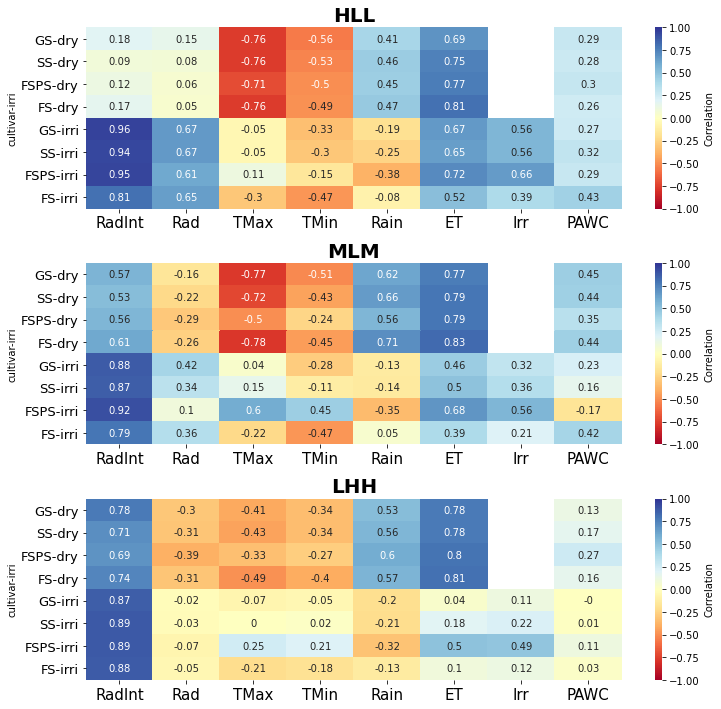

In [65]:
df_corr.rename(columns={'RadiationIn':'Rad','aMaxT':'TMax','aMinT':'TMin',
                        'RainIn':'Rain','actual_ET':'ET','IrrigationIn':'Irr','radInt':'RadInt'}, inplace=True)

hll = df_corr.loc[df_corr['env'] == 'HLL']
hll2 = hll.drop(['env'], axis=1)
mlm = df_corr.loc[df_corr['env'] == 'MLM']
mlm2 = mlm.drop(['env'], axis=1)
lhh = df_corr.loc[df_corr['env'] == 'LHH']
lhh2 = lhh.drop(['env'], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
sns.heatmap(hll2, ax=ax1, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(mlm2, ax=ax2, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(lhh2, ax=ax3, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

ax1.set_title('HLL', fontweight='bold', size=20)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=13)

ax2.set_title('MLM', fontweight='bold', size=20)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=13)

ax3.set_title('LHH', fontweight='bold', size=20)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=13)

plt.subplots_adjust(wspace=0, hspace=0.3)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)

## Others

In [66]:
#Density plot#

dfa3.loc[dfa3.cultivar == 0, 'cv'] = "GS"
dfa3.loc[dfa3.cultivar == 1, 'cv'] = "FS"
dfa3.loc[dfa3.cultivar == 2, 'cv'] = "SS"
dfa3.loc[dfa3.cultivar == 3, 'cv'] = "FSPS"

dfa3.loc[dfa3.irr == 1, 'Irr'] = "R"
dfa3.loc[dfa3.irr == 2, 'Irr'] = "I"

g = sns.FacetGrid(dfa3, col="env_name", row='Irr', hue="cv",hue_order= ['GS','SS','FSPS','FS'], sharey=True, size=3,
                  aspect=1, palette='Dark2')

g.map(sns.kdeplot,"biomass",shade=True)

g.add_legend(fontsize=15,title=False,bbox_to_anchor=(0.87, 0.8))
g.set_xlabels("")
axes = g.axes.flatten()

axes[0].yaxis.set_tick_params(labelsize=13)
axes[3].yaxis.set_tick_params(labelsize=13)
axes[3].set_xlim(0,28000)
axes[3].xaxis.set_tick_params(labelsize=12)
axes[3].xaxis.set_major_locator(ticker.MultipleLocator(10000))
axes[4].set_xlim(0,28000)
axes[4].xaxis.set_tick_params(labelsize=12)
axes[4].xaxis.set_major_locator(ticker.MultipleLocator(10000))
axes[5].set_xlim(0,28000)
axes[5].xaxis.set_tick_params(labelsize=12)
axes[5].xaxis.set_major_locator(ticker.MultipleLocator(10000))

axes[0].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[0].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[0].patch.set_facecolor('0.90')
axes[1].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[1].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[1].patch.set_facecolor('0.90')
axes[2].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[2].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[2].patch.set_facecolor('0.90')
axes[3].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[3].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[3].patch.set_facecolor('0.90')
axes[4].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[4].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[4].patch.set_facecolor('0.90')
axes[5].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[5].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[5].patch.set_facecolor('0.90')

g.fig.text(0.5, 0, 'Biomass ($kg\,ha^{-1}$)', ha='center', fontsize =14)
g.fig.text(-0.01, 0.52, 'Density', va='center', rotation='vertical', fontsize =14)
g.fig.subplots_adjust(wspace=0.2, hspace=0.22)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\density.png', dpi=300, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

<ipython-input-67-dd75683abfc7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


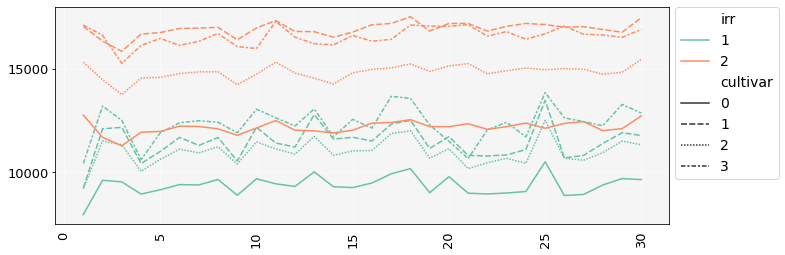

In [67]:
#Biomass vs year#

fig= plt.figure(figsize=(11,4))

ax=plt.subplot(1, 1, 1)

ax = sns.lineplot(x="time", y="biomass",hue="irr", style="cultivar", estimator=np.mean, data=df,
                  ci=95, err_style="band", palette='Set2')

# Formatting graph and background
plt.legend(prop=dict(size=14),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('', fontsize =15)
plt.xlabel('', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
#ax.set_ylim([10.1,21.9])
#ax.set_xlim([1979.5,2009.5])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

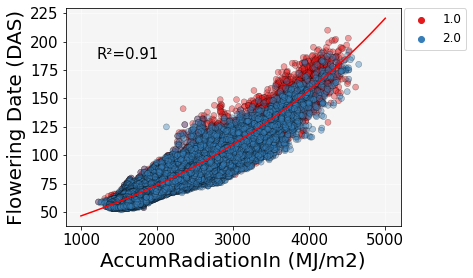

In [70]:
from pylab import *
from scipy.optimize import curve_fit
kwargs  =   {'edgecolor':"k"}

df0 = df.where(df['FloweringDAS'] != 0)
df1 = df0.where(df['RadiationIn'] != 0)
df_flo = df1.dropna()

#Create filters and rearrange dataframes
dry = df_flo.loc[df_flo['irr'] == 1]
irri = df_flo.loc[df_flo['irr'] == 2]

#Grouping
GS = df_flo.loc[df_flo['cultivar'] == 0]
FS = df_flo.loc[df_flo['cultivar'] == 1]
SS = df_flo.loc[df_flo['cultivar'] == 2]
FSPS = df_flo.loc[df_flo['cultivar'] == 3]

GSd = dry.loc[dry['cultivar'] == 0]
FSd = dry.loc[dry['cultivar'] == 1]
SSd = dry.loc[dry['cultivar'] == 2]
FSPSd = dry.loc[dry['cultivar'] == 3]

GSi = irri.loc[irri['cultivar'] == 0]
FSi = irri.loc[irri['cultivar'] == 1]
SSi = irri.loc[irri['cultivar'] == 2]
FSPSi = irri.loc[irri['cultivar'] == 3]

x =GSd.RadiationIn.values
y =GSd.FloweringDAS.values

def func(x, a, c, d):
    return a*np.exp(-c*x)+d

popt, pcov = curve_fit(func, x, y, p0=(1, 1e-6, 1))

xx = np.linspace(1000, 5000, 500)
yy = func(xx, *popt)
sns.scatterplot(x='RadiationIn', y='FloweringDAS', hue='irr', data=GS, palette='Set1', **kwargs, alpha=0.4)
plot(xx, yy, color='r')

residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r2=str(r_squared.round(2))
plt.text(1200, 185,'R²='+r2,fontsize=15,color='k')

plt.legend(prop=dict(size=12),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.xlabel('AccumRadiationIn (MJ/m2)', fontsize =20)
plt.ylabel('Flowering Date (DAS)', fontsize =20)

ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

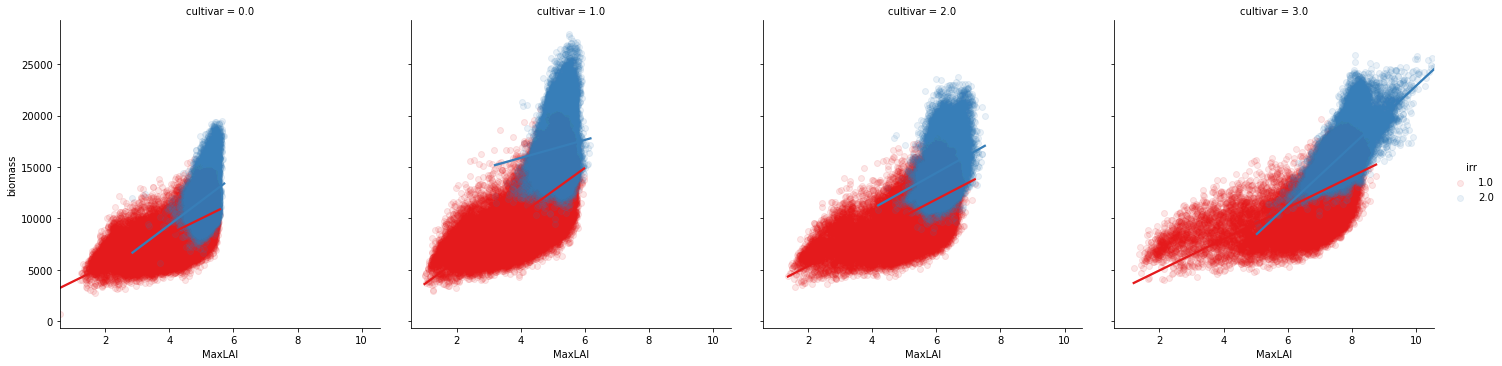

In [71]:
sns.lmplot(x="MaxLAI", y="biomass",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

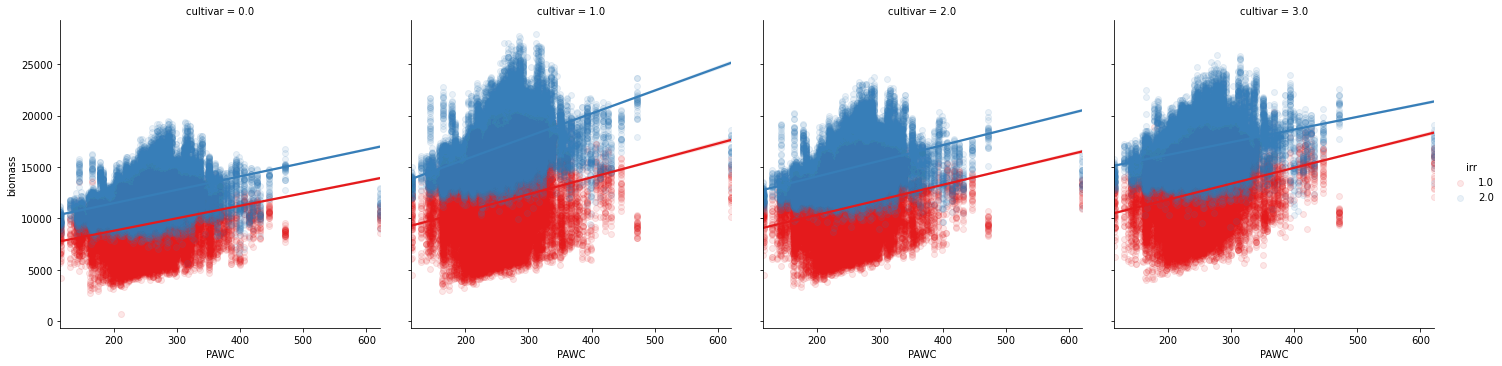

In [72]:
sns.lmplot(x="PAWC", y="biomass",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

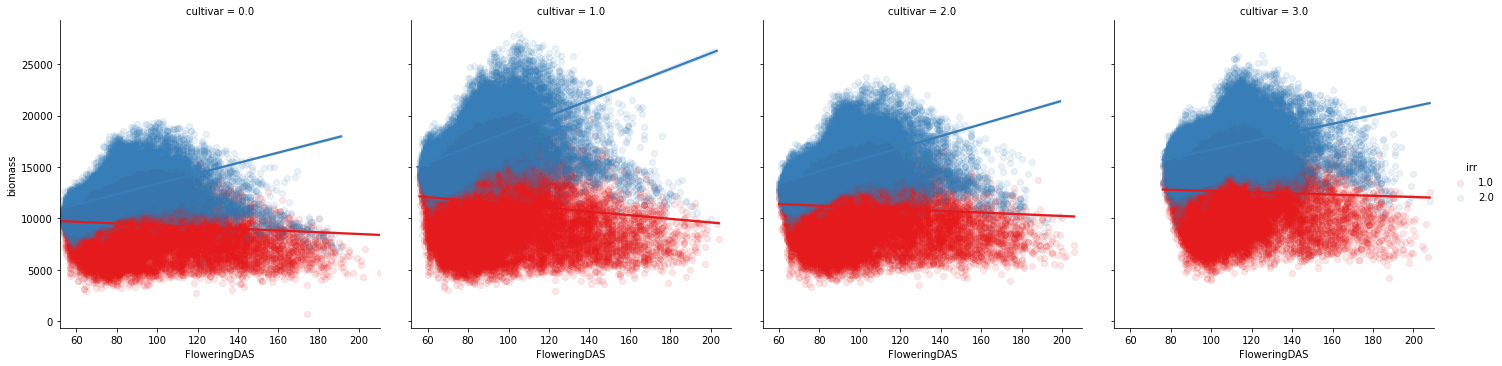

In [73]:
sns.lmplot(x="FloweringDAS", y="biomass",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

<AxesSubplot:xlabel='cultivar', ylabel='FloweringDAS'>

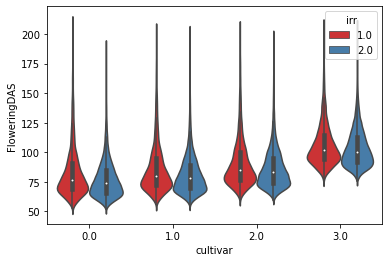

In [74]:
kwargs  =   {'edgecolor':"k"}
sns.violinplot(x="cultivar", y="FloweringDAS",hue='irr', data=df_flo, palette='Set1')

In [75]:
#sns.pairplot(df_mean, hue='cultivar', vars=['biomass', 'yield','IrrigationIn', 'FloweringDAS', 'MaxLAI', 'RainIn', 'TempIn', 'RadiationIn',
#       'WaterUse', 'actual_ET'])

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


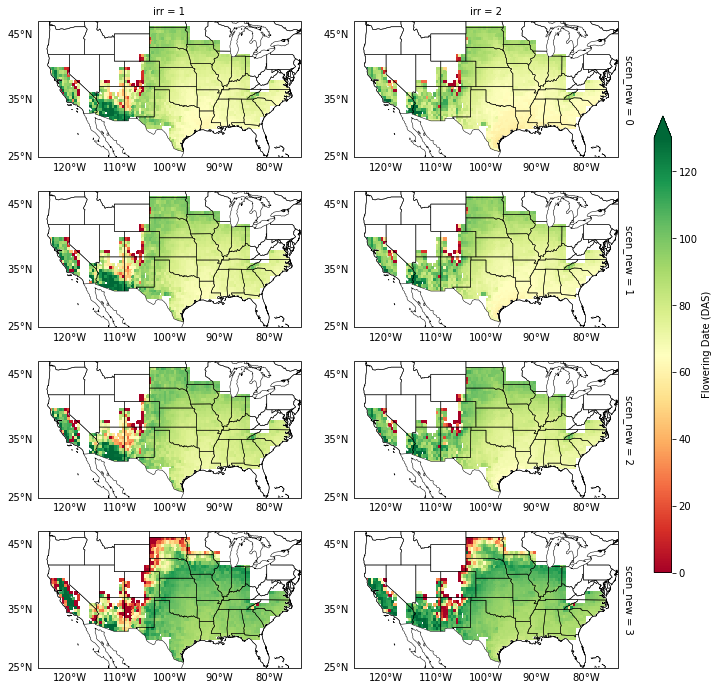

In [76]:
#Plotting FloweringDas

map_proj = ccrs.Mercator(central_longitude=-95)

p = data2.FloweringDAS.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=0, vmax=130,
    figsize=(13,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Flowering Date (DAS)"}, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    area(ax, value, "white")
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels =False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([25, 35, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    
for value in iso3 :
    area(ax, value, "white")
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


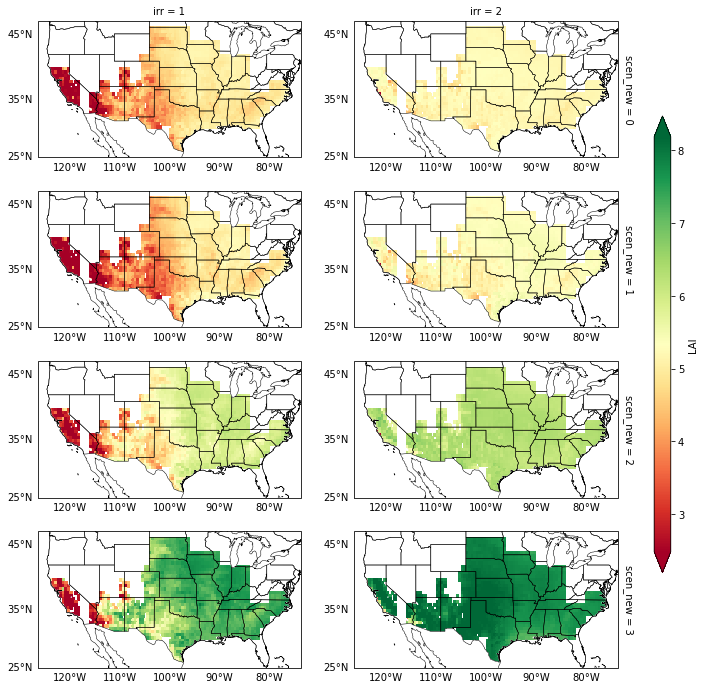

In [77]:
#Plotting MaxLAI

map_proj = ccrs.Mercator(central_longitude=-95)

p = data2.MaxLAI.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #vmin=7000, vmax=20000,
    figsize=(13,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "LAI"}, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    area(ax, value, "white")
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels =False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([25, 35, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    
for value in iso3 :
    area(ax, value, "white")
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


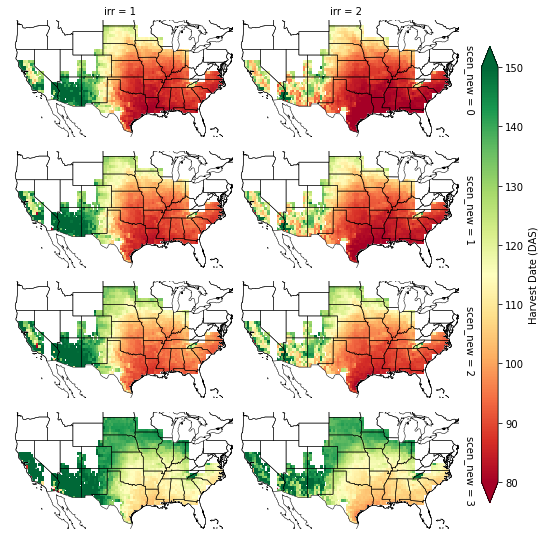

In [78]:
#Plotting biomass

map_proj = ccrs.Mercator(central_longitude=-95)

p = data2.DaysAfterSowing.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=80, vmax=150,
    figsize=(10,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Harvest Date (DAS)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.axis("off")
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0, hspace=-0.5)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=25, label='Harvest Date (DAS)')
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

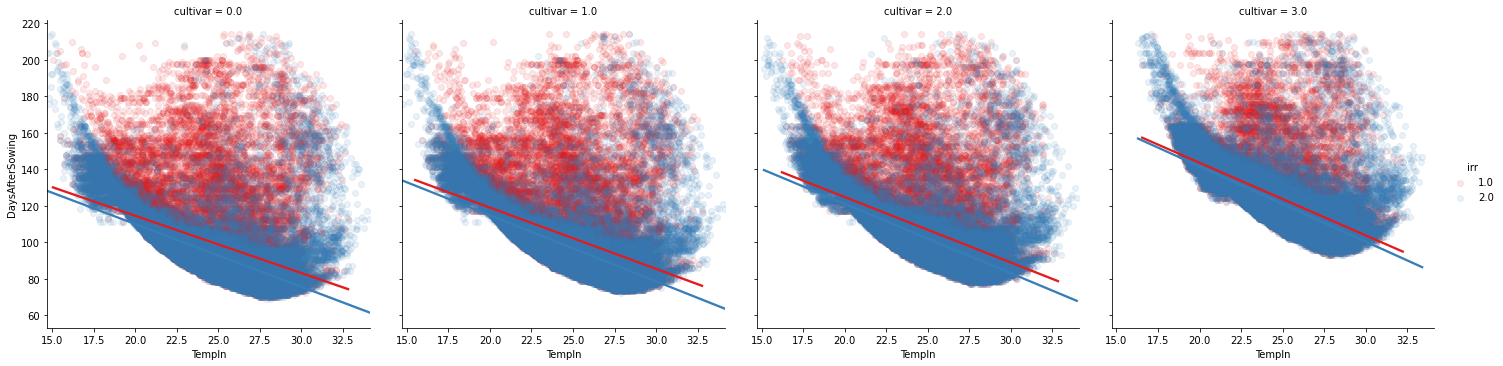

In [79]:
sns.lmplot(x="TempIn", y="DaysAfterSowing",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


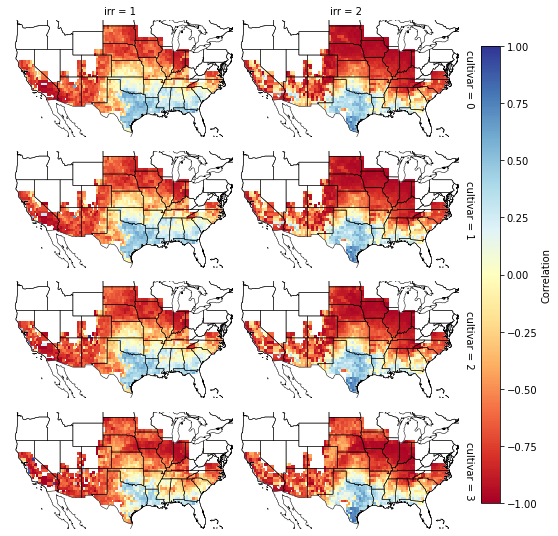

In [80]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='TempIn'
x='DaysAfterSowing'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','DaysAfterSowing'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.TempIn.plot(x='lon', y='lat', col='irr', row='cultivar', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(10,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.axis("off")
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0, hspace=-0.5)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=25, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [81]:
#Plot correlations using scatter plot and basemap
#Calculate correlation between defined variables
""""
x='biomass'
y='RainIn'

a=df1.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
df = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Create list of values for mapping using scatter plot

GSd = df[(df.cultivar == 0) & (df.irr == 1)]
GSd_lon = GSd['lon'].values
GSd_lat = GSd['lat'].values
GSd_y = GSd[y].values

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import os
os.environ["PROJ_LIB"] = r'C:\Users\uqjojeda\Anaconda3\Library\share'
from mpl_toolkits.basemap import Basemap

fig= plt.figure(figsize=(12,5))

ax=plt.subplot(1, 1, 1)
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', llcrnrlon=-125, llcrnrlat=24, urcrnrlon=-75, urcrnrlat=47, resolution='l')
#m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawmapboundary(fill_color='white')
m.drawstates(color="k", linewidth=0.5)
m.drawcoastlines(color="k", linewidth=0.5)
m.drawcountries(color="k", linewidth=0.5)
# labels = [left,right,top,bottom]
parallels = (25,35,45)
m.drawparallels(parallels,labels=[True,True,True],linewidth=0,size=14)
meridians = (-80, -90,-100,-110, -120)
m.drawmeridians(meridians,labels=[True,True,True,True,True],linewidth=0,size=14)
# plot points using color for heat data and size for altitude
m.scatter(GSd_lon, GSd_lat, latlon=True, c=GSd_y, alpha=1, s=35, cmap='RdYlBu', linewidths=0, zorder=1, marker=',')

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.02, pad=0.1)
cb.set_label(label='correlation', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(-1, 1)
cb.set_alpha(1)
cb.draw_all()
#cb.remove()

#ax.set_title('BrC (242)',fontsize= 20,weight='bold') 
#ax.title.set_position([0.5,1.06])
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\harvest\TT\2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-81-4c46144ab673>, line 61)